# <font color="#0F8FBF">Центральная предельная теорема на примере гамма-распределения</font>

Ссылка на wiki: [гамма-распределение](https://en.wikipedia.org/wiki/Gamma_distribution)

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

Определеим аргументы гамма-рампределения

In [2]:
alpha = 1.1 # первый аргумент функции гамма-распределения
beta = 2 # второй аргумент функции гамма-распределения
scale = 1 / beta # с помощью этого параметра задаётся beta для гамма-распределения в scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

Согласно статье на [вики](https://en.wikipedia.org/wiki/Gamma_distribution), математическое ожидание гамма-распределение расчитывается как:

$\mathbb{E}X={\Large\frac{\alpha}{\beta}}$

Дисперсия:

$\mathbb{D}X={\Large\frac{\alpha}{\beta^2}}$

В нашем случае:
* $\alpha = 1.1$
* $\beta = 2$

Тогда:

<font color="D7BA7D">$\mathbb{E}X$</font>$={\Large\frac{1.1}{2}} = 0.55$

<font color="D7BA7D">$\mathbb{D}X$</font>$={\Large\frac{1.1}{2^2}} = 0.275$

Расчитаем среднее значение и дисперсию в python

In [3]:
mean = alpha / beta
var = alpha / beta**2

Сгенерируем выборку объема N=1000. Отобразим её на графике, а также теоретическую плоность гамма-распределения

Text(0.5, 0, '$x$')

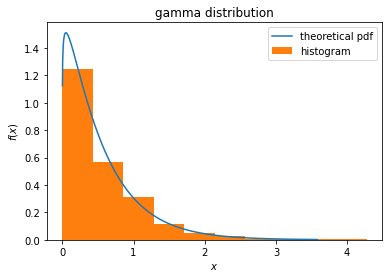

In [4]:
N = 1000 # размер выборки

# sts.gamma.ppf - обратная функция гамма-распределения, которая по значению функции вернёт её аргумент
x = np.linspace(sts.gamma.ppf(0.001, alpha, scale=scale),
                sts.gamma.ppf(0.999, alpha, scale=scale), N)

gamma_rv = sts.gamma(alpha, scale=scale)
sample = gamma_rv.rvs(size=N)
y = gamma_rv.pdf(x)

plt.plot(x, y, label='theoretical pdf')
plt.hist(sample, density=True, label='histogram')

plt.legend()

plt.title("gamma distribution")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Определим функции:
* get_sample_mean(n, sn) - Получить распределение средневыборочных по `sn` выборкам объёма `n`  
    В теле данной функции распределение средневыборочных расчитывается следующим образом:
    * 1000 раз выбираем `n` значений из исходного распределения случайной величины и считаем его среднее по данной выборке, после чего добавляем его в массив средних, который будет распределением средних выборок объема `n`
* get_theoretical_means(n) - Получить плотность нормального распределения средневыборочных по выборкам объема `n` на основе параметров исходного распределения  
    В теле данной функции плотность нормального распределения выборочных средних рассчитывается следующим образом:
    * расчитывается стандартное отклонение как <font color="D7BA7D">$~\sigma$</font> $=\sqrt{\Large\frac{var}{n}}$, где var - ранее посчитанная дисперсия гамма-распределения, n - объем выборки, передаётся как аргумент функции
    * Генерируем равномерно распределённые входные данные для нормального распределения от $~\mu - 3\sigma~$ до $~\mu + 3\sigma~$, где <font color="D7BA7D">$\mu$</font> - математическое ожидание исходной случайной величины, а <font color="D7BA7D">$\sigma$</font> - стандартное отколнение выборочных средних посчитанное на предыдущем шаге
    * Строим плотность нормального распределения выборочных средних от входных данных, математического ожидания <font color="D7BA7D">$\mu$</font> и среднеквадратичного отклонения <font color="D7BA7D">$\sigma$</font>, посчитанных на предыдущих шагах.
    * Возвращаем x, y полученного нормального распределения
* plot_sample_means(n) - Используя функции выше отобразить на графике гистограммы распределения средневыборочных, а также плотность их нормального распределения

In [5]:
def get_sample_mean(n, sn):
    means = list()
    for _ in range(sn): # Для sn выборок
        sample = gamma_rv.rvs(size=n) # делаем выборку объема n их исходной случайной величины
        smean = sum(sample) / n # считаем среднее по выборке
        means.append(smean) # добавляем в массив выборочных средних
    return np.array(means)

def get_theoretical_means(n):
    global mean
    global var
    sigma = sqrt(var/n) # стандартное отклонение для нормального распределения выборочных средних
    norm_rv = sts.norm(loc=mean, scale=sigma)
    x_norm = np.linspace(mean-3*sigma, mean+3*sigma, 1000) # генерируем входные данные для плотности распределения от -3sigma до +3sigma
    y_norm = norm_rv.pdf(x_norm) # получаем плотность нормального распределения от входных данных на предыдущем шаге
    return x_norm, y_norm

samples_number = 1000

def plot_sample_means(n):
    global samples_number
    x_norm, y_norm = get_theoretical_means(n)
    means = get_sample_mean(n, samples_number)
    plt.hist(means, density=True, label='sample means') # строим гистограмму выборочных средних
    plt.plot(x_norm, y_norm, label='normal distribution') # строим нормальное распределение выборочных средних
    plt.legend()

    plt.title(f"sample means (n = {n})")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

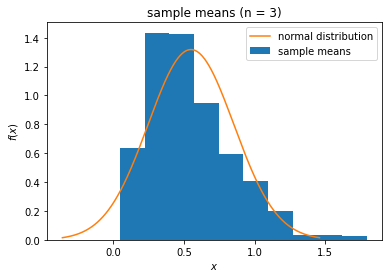

In [6]:
# Построим гистограмму выборочных средних и плотность их нормального распределения для n=3
plot_sample_means(n=3)

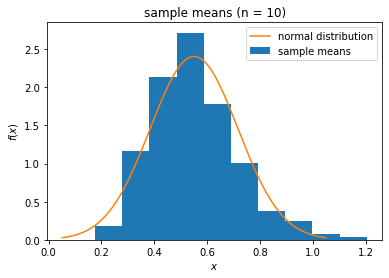

In [7]:
# Построим гистограмму выборочных средних и плотность их нормального распределения для n=10
plot_sample_means(n=10)

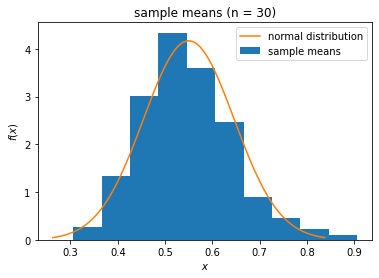

In [8]:
# Построим гистограмму выборочных средних и плотность их нормального распределения для n=30
plot_sample_means(n=30)

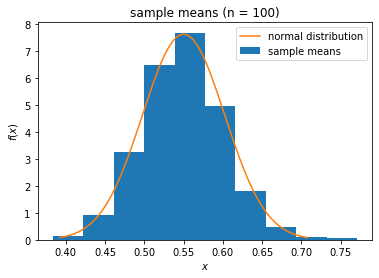

In [9]:
# Построим гистограмму выборочных средних и плотность их нормального распределения для n=100
plot_sample_means(n=100)

## <font color="#0F8FBF">Выводы</font>

Исходное гамма-распределение сильно скошено вправо.

Когда мы строим распределение средних по выборкам объема 3, то видно, что оно становиться больше похожим на нормальное, но скошенность сохраняется

И чем больше мы увеличиваем объем выборки, тем больше распределение становится похоже на нормальное и тем меньше скошенность графика вправо, а также уменьшается дисперсия и распределение выборочных средних всё больше сходиться к теоретической оценке математического ожидания исходной случайной величины.